In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

### Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

<BarContainer object of 12 artists>

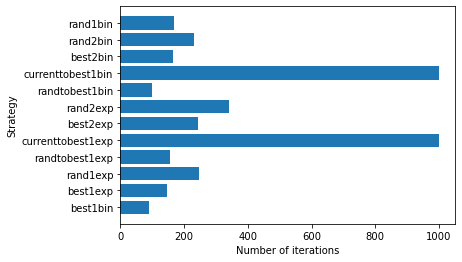

In [2]:
strategies = (
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'rand2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand2bin',
    'rand1bin'
)

data = []
names = []

for strategy in strategies:
    res = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
    names.append(strategy)
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Strategy')
ax.barh(names, data)

<BarContainer object of 10 artists>

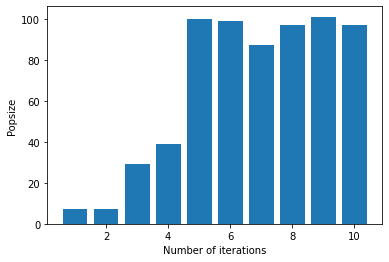

In [3]:
data = []
names = []

for popsize in range(1, 11):
    res = differential_evolution(ackley, bounds, seed=42, popsize=popsize)
    
    names.append(popsize)
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Popsize')
ax.bar(names, data)

<BarContainer object of 10 artists>

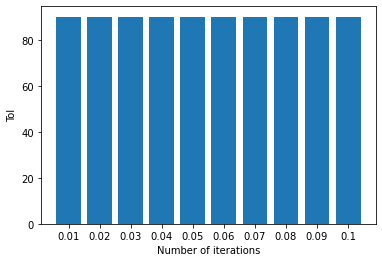

In [4]:
data = []
names = []

for i in range(1, 11):
    tol = i/100
    res = differential_evolution(ackley, bounds, seed=42, tol=tol)
    names.append(str(tol))
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Tol')
ax.bar(names, data)

<BarContainer object of 10 artists>

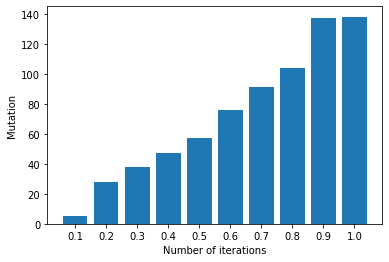

In [5]:
data = []
names = []

for i in range(1, 11):
    mutation = i/10
    res = differential_evolution(ackley, bounds, seed=42, mutation=mutation)
    names.append(str(mutation))
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Mutation')
ax.bar(names, data)

<BarContainer object of 10 artists>

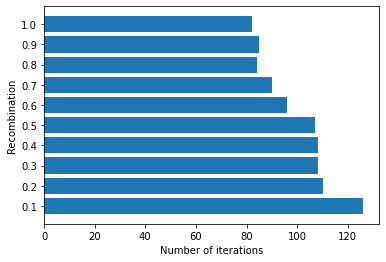

In [6]:
data = []
names = []

for i in range(1, 11):
    recombination = i/10
    res = differential_evolution(ackley, bounds, seed=42, recombination=recombination)
    names.append(str(recombination))
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Recombination')
ax.barh(names, data)

<BarContainer object of 2 artists>

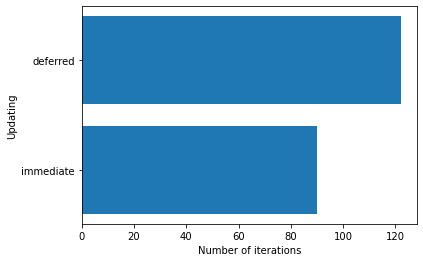

In [7]:
updating_method = (
    'immediate',
    'deferred'
)

data = []
names = []

for updating in updating_method:
    res = differential_evolution(ackley, bounds, seed=42, updating=updating)
    names.append(updating)
    data.append(res.nit)
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Updating')
ax.barh(names, data)

### Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

Применим тот же алгоритм дифференциальной эволюции для числовых параметров, категориальные параметры подберем используя метод перебора

In [8]:
strategies = (
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'rand2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand2bin',
    'rand1bin'
)

updating_methods = (
    'immediate',
    'deferred'
)


# Сохраняем лучший результат пары стратегия/метод обновления
best_params = {}
best_nit = 1000000

for strategy in strategies:
    for updating in updating_methods:
        #  Функция проверки качества для выбранных параметров, считает число итераций
        def nit(x):
            popsize = round(x[0])
            tol = x[1]
            mutation = x[2]
            recombination = x[3]

            # Считаем число итераций
            res = differential_evolution(
                ackley, 
                bounds,
                seed=42, 
                strategy=strategy,
                popsize=popsize,
                tol=tol,
                mutation=mutation,
                recombination=recombination,
                updating=updating
            )
            return res.nit
        
        # подбираем параметры
        res = differential_evolution(
            nit, 
            [(10,20),(0,1),(0,2),(0,1)],
            seed=42
        )
        
        # если результат пары статегия/обновление наилучший, сохраняем
        if res.fun < best_nit:
            best_nit = res.fun
            best_params = {
                'strategy': strategy,
                'popsize': round(res.x[0]),
                'tol': res.x[1],
                'mutation': res.x[2],
                'recombination': res.x[3],
                'updating': updating
            }

print(best_params)

{'strategy': 'best1bin', 'popsize': 20, 'tol': 0.34118619014127577, 'mutation': 1.2068113243863334, 'recombination': 0.5370351301745122, 'updating': 'immediate'}
